# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
# Carregando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

# Carregando e visualizando a base de dados
Aqui vemos que algumas colunas não são necessárias e temos uma boa ideia de como está nossa base de dados

In [2]:
# Abrindo e visualizando a base de dados.
data = pd.read_csv('previsao_de_renda.csv')


# cópia do DataFrame sem as colunas index, mau e unnamed.
datadrop = data.drop(['index', 'mau', 'Unnamed: 0'], axis=1).copy()

datadrop.head()    

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


# Preparação da base de dados
Aqui estou fazendo uma reamostragem da base de dados para simular que essa base tenha medidas em três meses distintos, para podermos comparar as distribuições das variáveis no tempo.

In [3]:
n_meses = 12
n_clientes = 1000

datas = pd.Series(pd.date_range('1/1/2015', periods = n_meses, freq = 'MS').repeat(n_clientes))

dados = datadrop.sample(n = n_meses * n_clientes, replace=True).reset_index()

dados2 = pd.concat([datas, dados], axis = 1)
dados2.rename({0:'data_ref'}, inplace = True, axis = 'columns')

In [4]:
dados2['data_ref']

,data_ref,data_ref
0,2015-01-01,2015-10-01
1,2015-01-01,2015-09-01
2,2015-01-01,2015-01-01
3,2015-01-01,2015-12-01
4,2015-01-01,2015-09-01
...,...,...
11995,2015-12-01,2015-09-01
11996,2015-12-01,2015-02-01
11997,2015-12-01,2015-03-01
11998,2015-12-01,2015-07-01


In [5]:
dados2 = dados2.loc[:, ~dados2.columns.duplicated()]

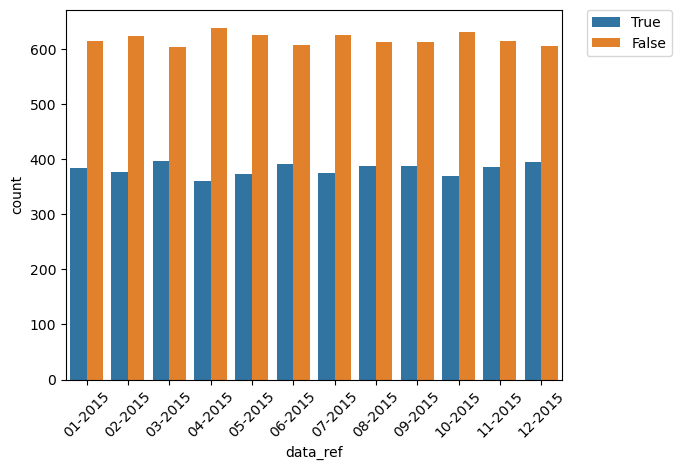

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converta os valores booleanos para strings
dados2['posse_de_veiculo'] = dados2['posse_de_veiculo'].astype(str)

# Crie o gráfico
ax = sns.countplot(x='data_ref', hue='posse_de_veiculo', data=dados2)

# Gere os rótulos dos ticks do eixo x
tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# Defina os ticks e os rótulos dos ticks
ax.set_xticks(list(range(dados2['data_ref'].nunique())))
ax.set_xticklabels(tick_labs, rotation=45)

# Ajuste a legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Mostre o gráfico
plt.show()


In [8]:
tab = pd.crosstab(dados2['data_ref'],dados2['posse_de_imovel'])
tab.div(tab.sum(axis = 1), axis = 0)

posse_de_imovel,False,True
data_ref,,
2015-01-01,0.347,0.653
2015-02-01,0.351,0.649
2015-03-01,0.325,0.675
2015-04-01,0.331,0.669
2015-05-01,0.328,0.672
2015-06-01,0.352,0.648
2015-07-01,0.331,0.669
2015-08-01,0.341,0.659
2015-09-01,0.347,0.653


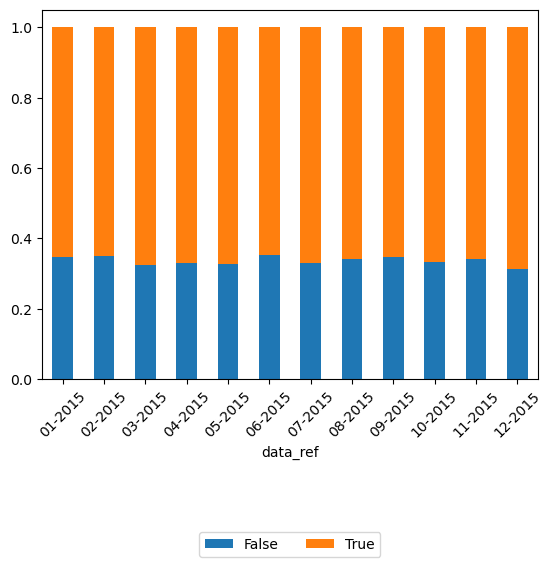

In [9]:
tab_freq = pd.crosstab(dados2['data_ref'],dados2['posse_de_imovel'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

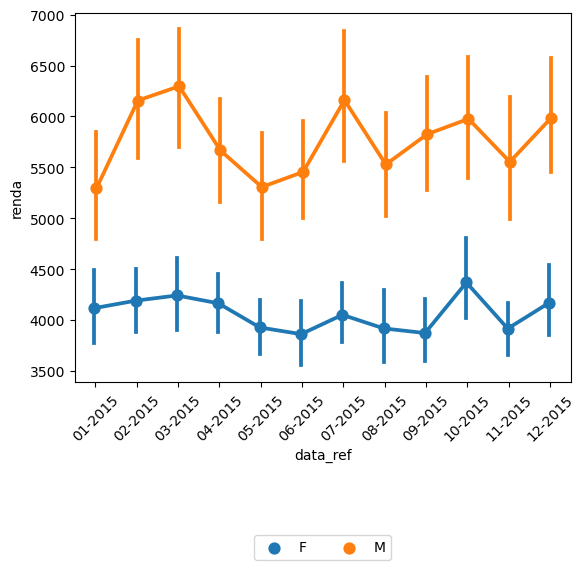

In [10]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'sexo',
                   data=dados2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

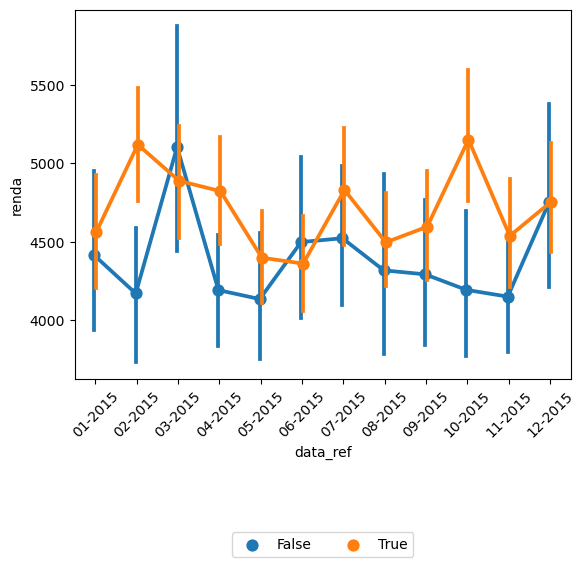

In [11]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_imovel',
                   data=dados2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

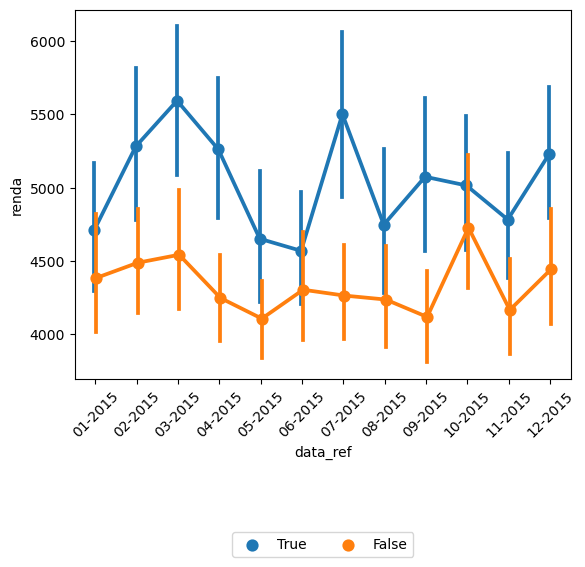

In [12]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_veiculo',
                   data=dados2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

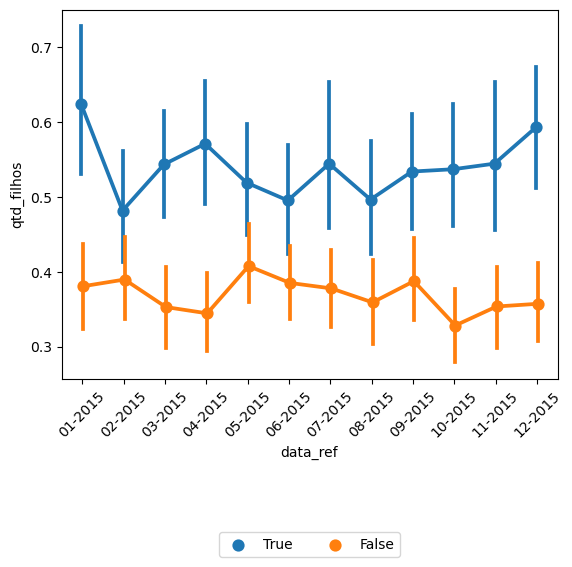

In [13]:
ax = sns.pointplot(x="data_ref", y="qtd_filhos", hue = 'posse_de_veiculo',
                   data=dados2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)